<a href="https://colab.research.google.com/github/trashpanda900/Data-Science/blob/main/TeddMcBrU6proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!pip install bambi

In [10]:
import bambi as bmb

https://www.kaggle.com/datasets/saife245/english-premier-league?resource=download
For my project, I wanted to predict what in-match stats would most often lead to goals in soccer. I used a dataset of stats from around 400 games from the English Premier League from 2020-2021.
The following abreviations are standins for these stats:
FTHG: Full Time Home Goals
FTAG: Full Time Away Goals
FTR: Full Time Result
HS: Home Shots
AS: Away Shots
HST: Home Shots on Target
AST: Away Shots on Target
HF: Home Fouls
AF: Away Fouls
HC: Home Corners
AC: Away Corners
HY: Home Yellow cards
AY: Away Yellow cards
HR: Home Red cards
AR: Away Red cards

In [11]:
soccer = pd.read_csv('https://raw.githubusercontent.com/trashpanda900/Data-Science/refs/heads/main/goog4_request%26X-Goog-Date%3D20260121T200142Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5688f1b742d6641cb5a76d61f6f9728f6e0a80379fe3bc46190391df28170738f61576291a136cf052bb219e385f4c8a8db806b2d9e75b405306f2fcbd613d6cbeda.csv')
soccer

,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,3,A,5,13,2,6,12,12,2,3,2,2,0,0
1,1,0,H,5,9,3,5,14,11,7,3,2,1,0,0
2,4,3,H,22,6,6,3,9,6,9,0,1,0,0,0
3,0,2,A,15,15,3,2,13,7,8,7,2,2,0,0
4,0,3,A,7,13,1,7,12,9,2,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,0,H,19,5,5,4,10,8,14,1,2,2,0,0
376,5,0,H,21,8,11,3,8,10,7,5,2,2,0,0
377,1,0,H,12,10,3,3,11,1,8,9,3,1,0,0
378,3,0,H,14,17,7,5,5,9,2,3,0,3,0,0


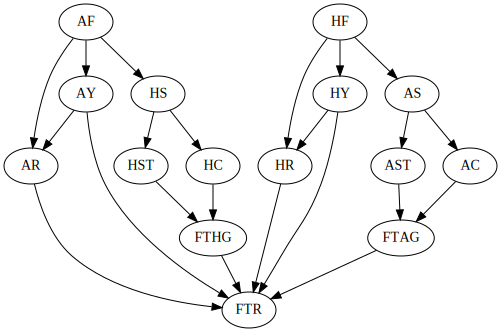

In [12]:

b_dag = gv.Digraph(name="Premier League")

b_dag.node('A','AF')
b_dag.node('B','HF')
b_dag.node('C','AY')
b_dag.node('D','HY')
b_dag.node('E','AR')
b_dag.node('F','HR')
b_dag.node('G','AS')
b_dag.node('H','HS')
b_dag.node('I','HST')
b_dag.node('J','FTHG')
b_dag.node('L','AST')
b_dag.node('M','FTAG')
b_dag.node('N','HC')
b_dag.node('O','AC')
b_dag.node('P','FTR')

b_dag.edges(['AH','AC','AE','CE','CP','EP','HI','HN','IJ','NJ','JP','BD','BG','BF','DF','DP','FP','GO','GL','OM','LM','MP'])

b_dag

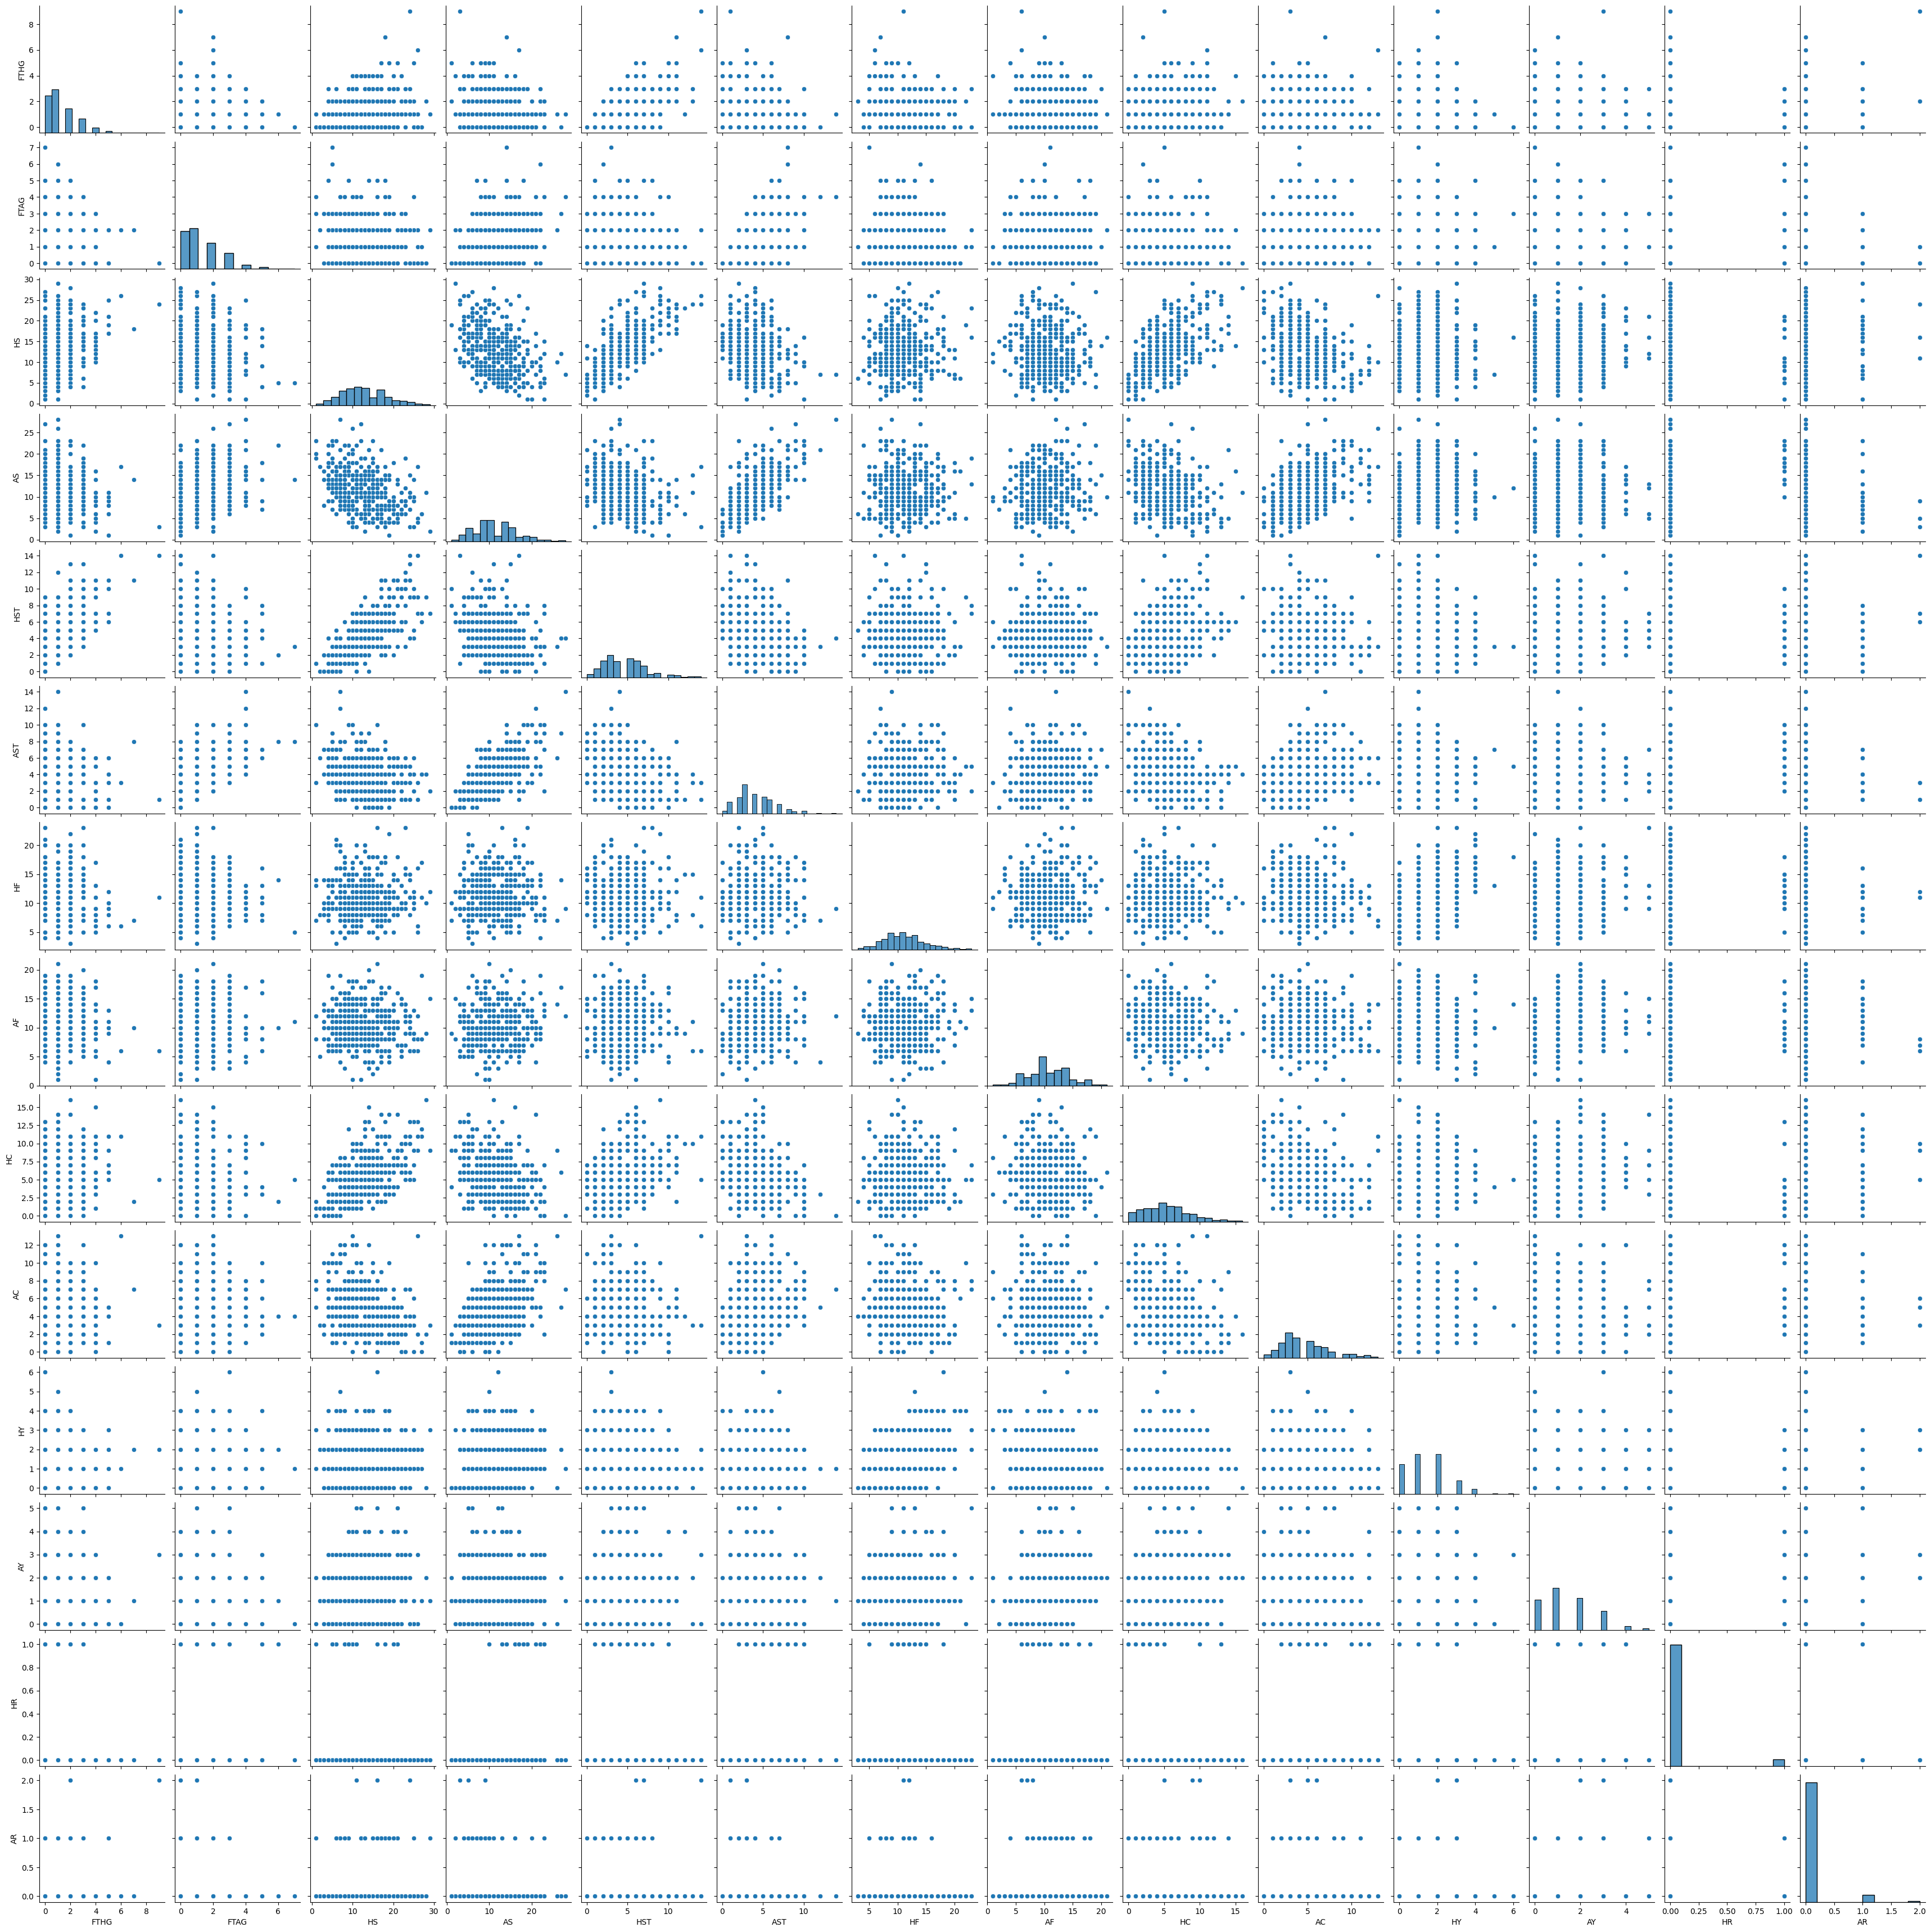

In [13]:
sns.pairplot(soccer)

Right off the bat I see some interesting correlations. For example, I see that shots (S or ST) seem to have a pretty high correlation with corners for the shooting team. My project wasn't necissarily about corners, and corners did not have a high correlation with goals, but I thought it was an interesting relationship.

In [14]:
model_every = bmb.Model("FTHG ~ AF + AY + AR + HS + HC + HST", soccer, family="negativebinomial")
idata_every = model_every.fit(idata_kwargs={"log_likelihood":True})

Output()

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='AF', ylabel='FTHG'>], dtype=object))

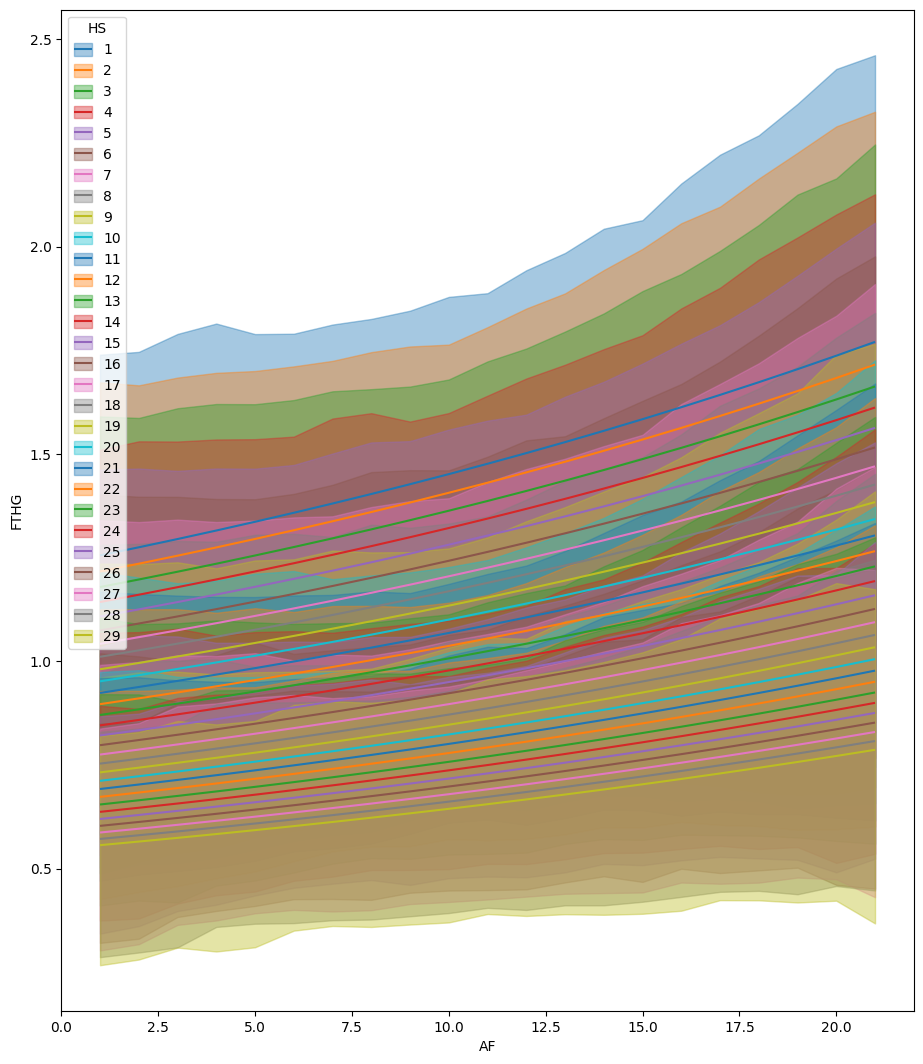

In [15]:

bmb.interpret.plot_predictions(model_every,
                               idata_every,
                               ["AF","HS"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)


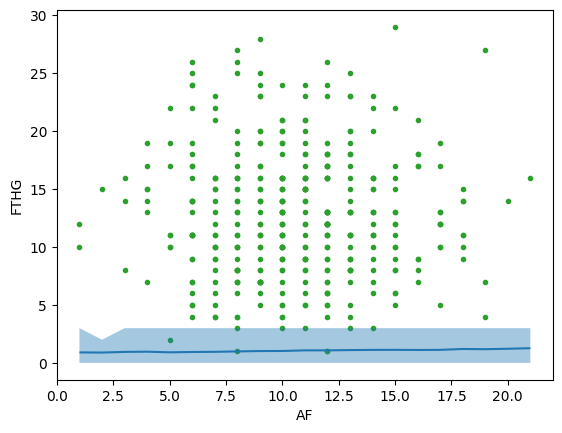

In [16]:
bmb.interpret.plot_predictions(model_every, idata_every, "AF", pps = True)
plt.plot(soccer.AF, soccer.HS, "C2.", zorder=-3)

Negligable change in slope means weak  correlation, plot also captures very few of the points.

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='HC', ylabel='FTHG'>], dtype=object))

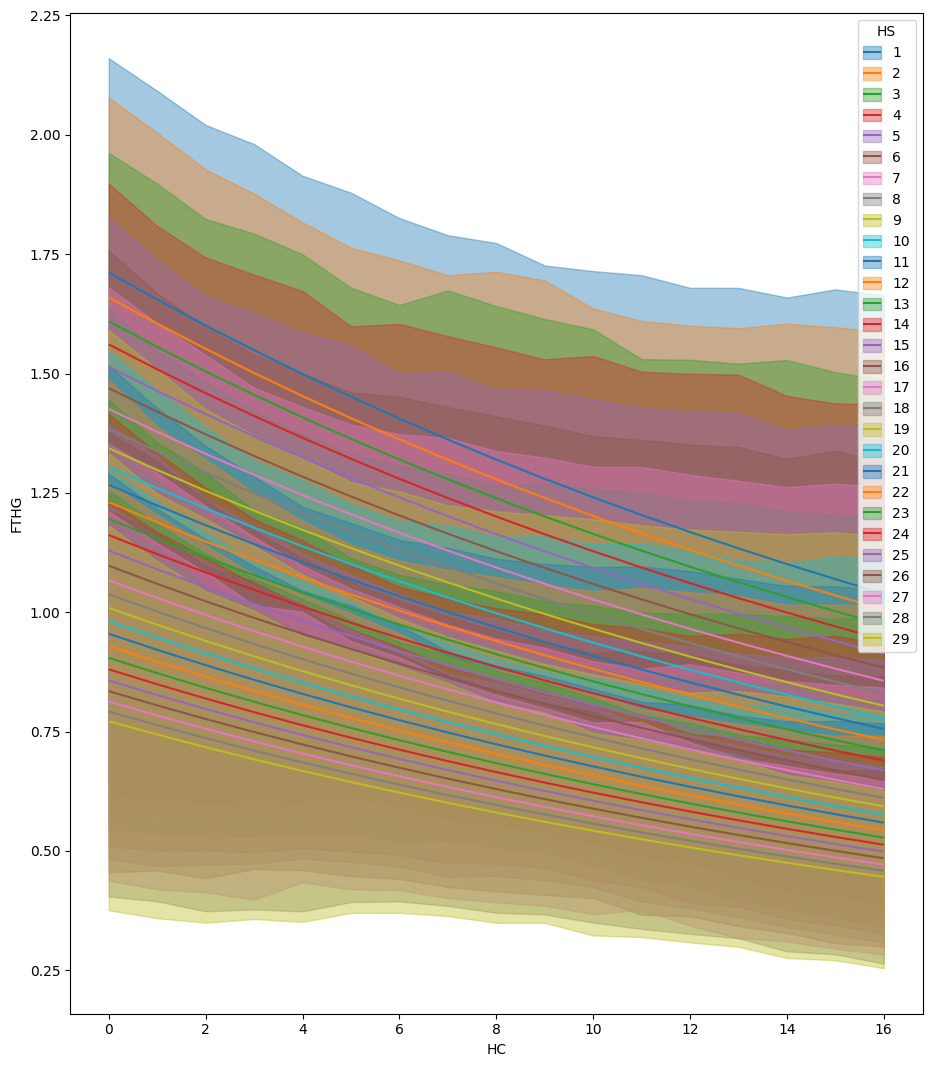

In [17]:
bmb.interpret.plot_predictions(model_every,
                               idata_every,
                               ["HC","HS"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

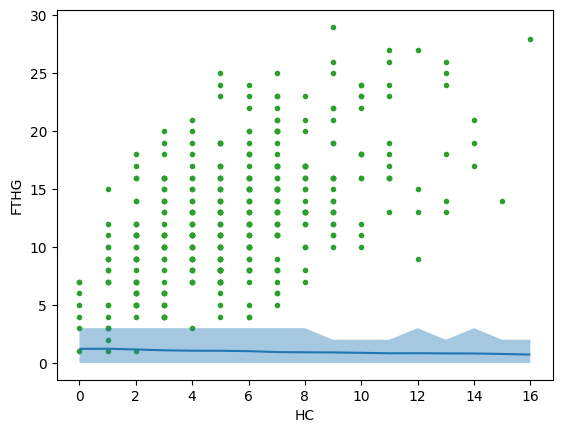

In [18]:
bmb.interpret.plot_predictions(model_every, idata_every, "HC", pps = True)
plt.plot(soccer.HC, soccer.HS, "C2.", zorder=-3)

Pretty much the same change in slope, not sure what made this one negaitve but I think its because the way the data is collected (more on this in conclusion). Slighly more points are captured this time.

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='AF', ylabel='FTHG'>], dtype=object))

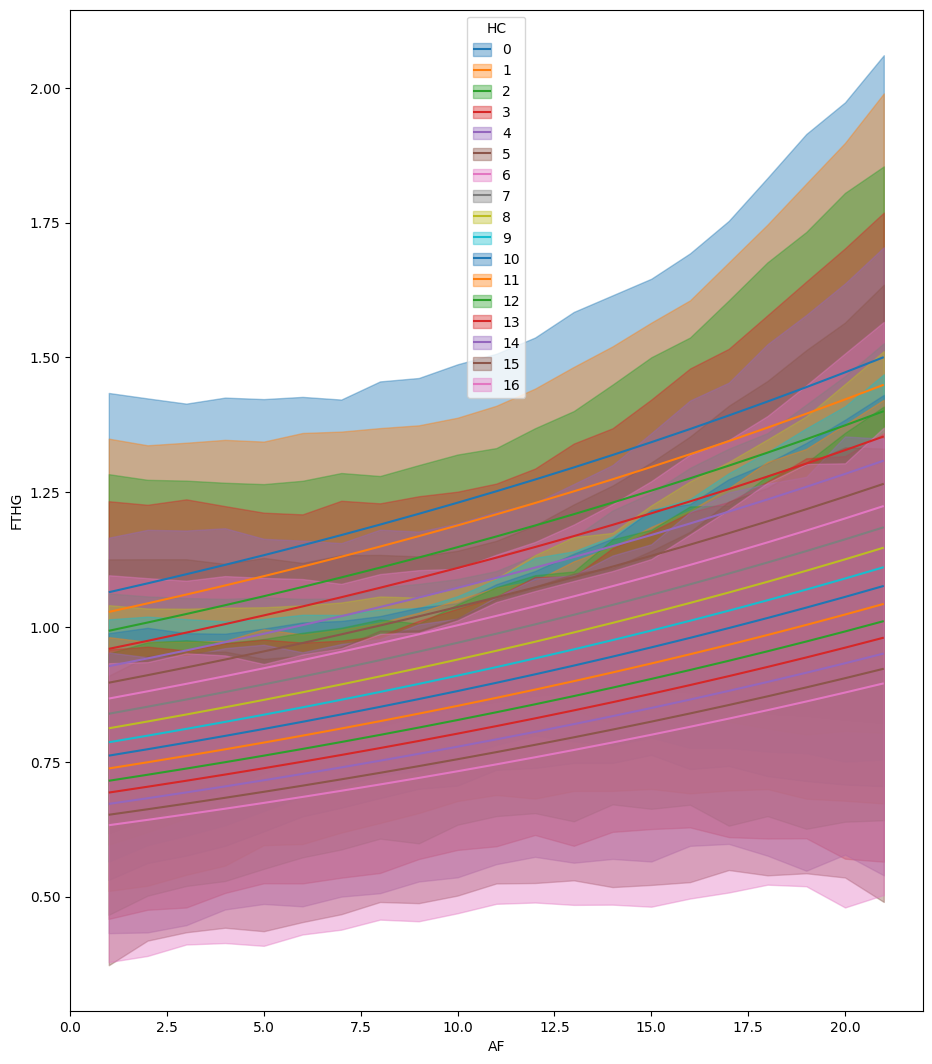

In [19]:
bmb.interpret.plot_predictions(model_every,
                               idata_every,
                               ["AF","HC"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

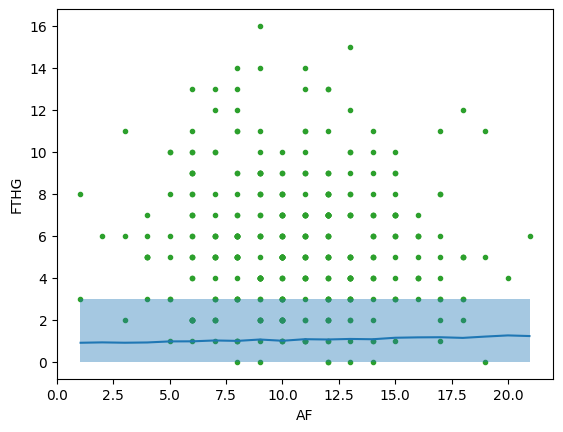

In [20]:
bmb.interpret.plot_predictions(model_every, idata_every, "AF", pps = True)
plt.plot(soccer.AF, soccer.HC, "C2.", zorder=-3)

Slighly larger change in slope, still too little to say there is a correlation. This graph does seem to capture a lot more points this time.

In [21]:
model_shotgoal = bmb.Model("FTHG ~ HS + HST", soccer, family="negativebinomial")
idata_shotgoal = model_shotgoal.fit(idata_kwargs={"log_likelihood":True})

Output()

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='HS', ylabel='FTHG'>], dtype=object))

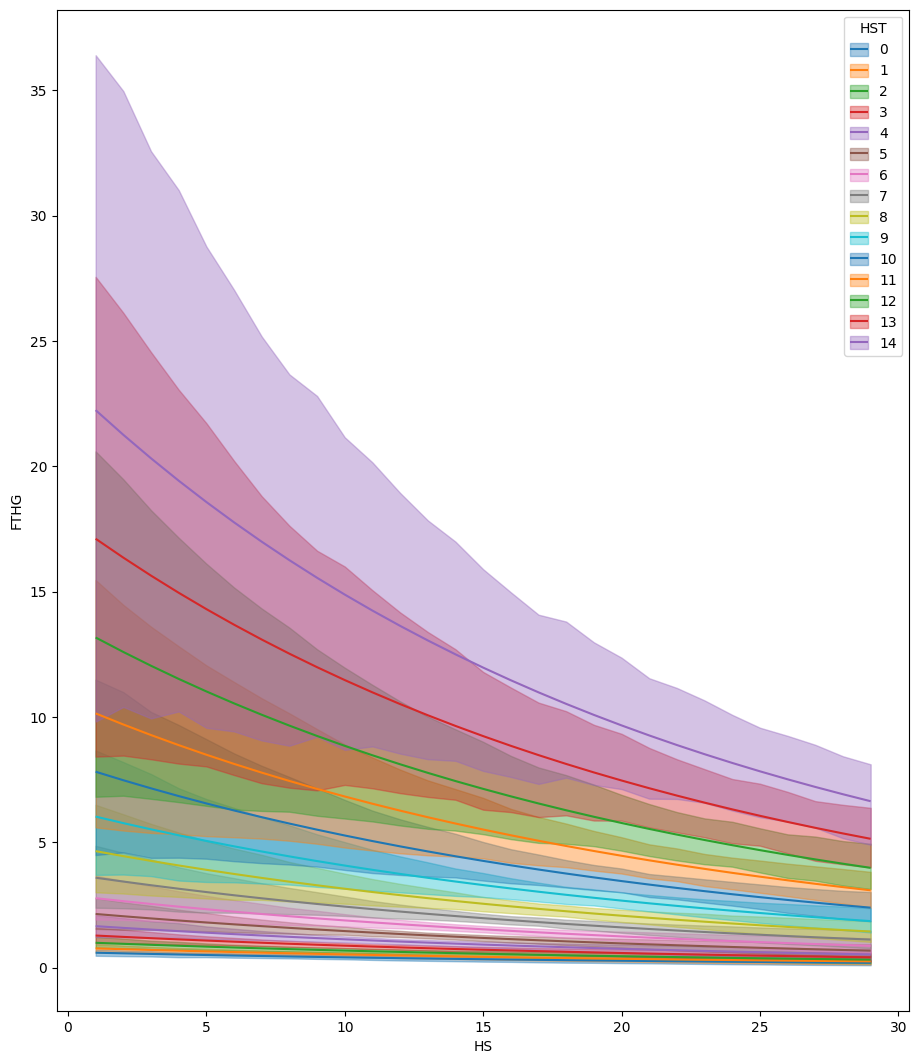

In [22]:
bmb.interpret.plot_predictions(model_shotgoal,
                               idata_shotgoal,
                               ["HS","HST"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

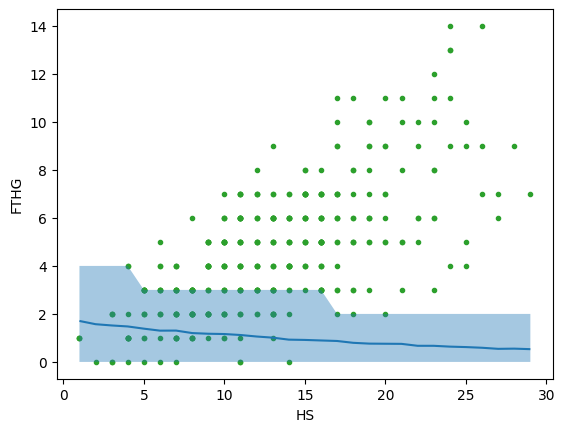

In [23]:
bmb.interpret.plot_predictions(model_shotgoal, idata_shotgoal, "HS", pps = True)
plt.plot(soccer.HS, soccer.HST, "C2.", zorder=-3)

Defenetly the best so far, clear change in slope, but dotplot implies that there is not a high enough correlation.

In [24]:
model_shotcorner = bmb.Model("FTHG ~ HST + HC", soccer, family="negativebinomial")
idata_shotcorner = model_shotcorner.fit(idata_kwargs={"log_likelihood":True})

Output()

Didn't expect for much to come from this as the original graph did not imply that there was a correlation between goals and corners

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='HST', ylabel='FTHG'>], dtype=object))

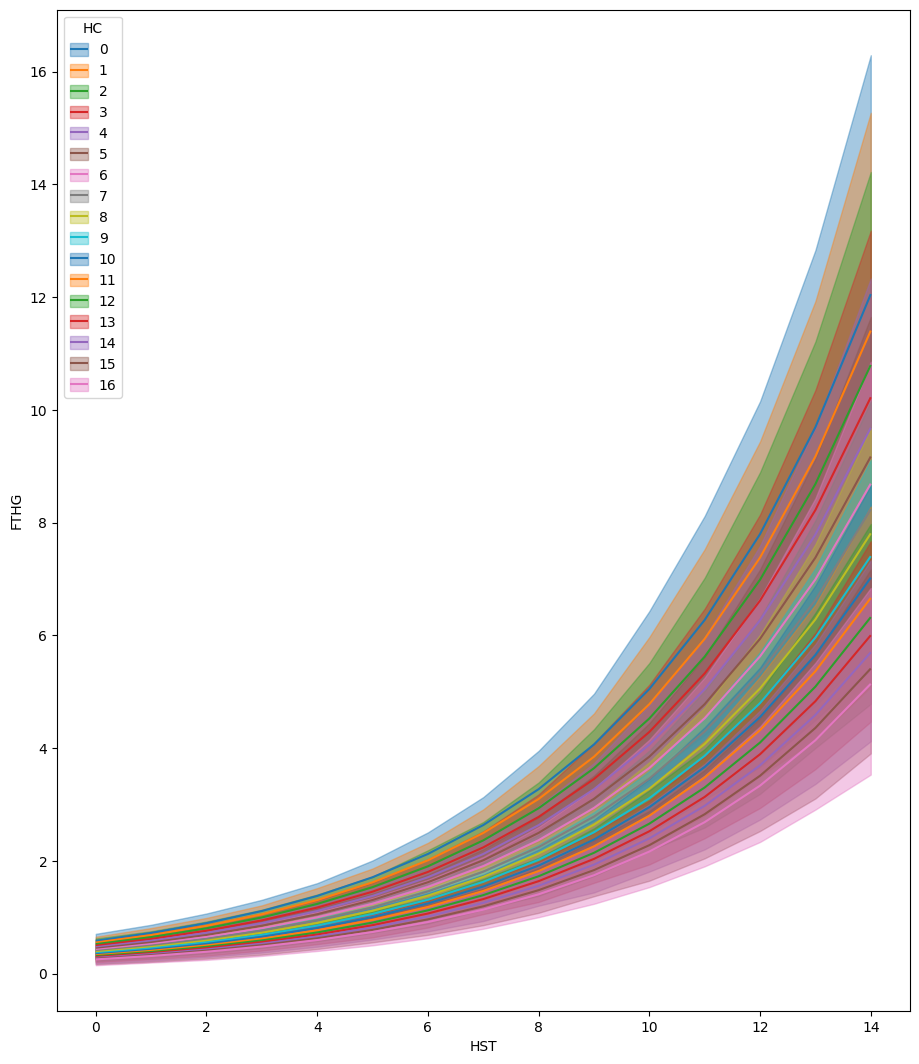

In [25]:
bmb.interpret.plot_predictions(model_shotcorner,
                               idata_shotcorner,
                               ["HST","HC"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

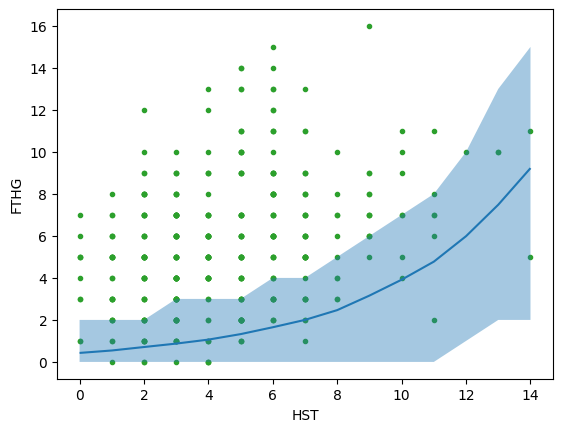

In [26]:
bmb.interpret.plot_predictions(model_shotcorner, idata_shotcorner, "HST", pps = True)
plt.plot(soccer.HST, soccer.HC, "C2.", zorder=-3)

Not bad, the graph captured about the same amount of points and has some change in slope for the posterrior predicitive.

In [27]:
model_shotaway = bmb.Model("FTHG ~ HST + FTAG", soccer, family="negativebinomial")
idata_shotaway = model_shotaway.fit(idata_kwargs={"log_likelihood":True})

Output()

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='HST', ylabel='FTHG'>], dtype=object))

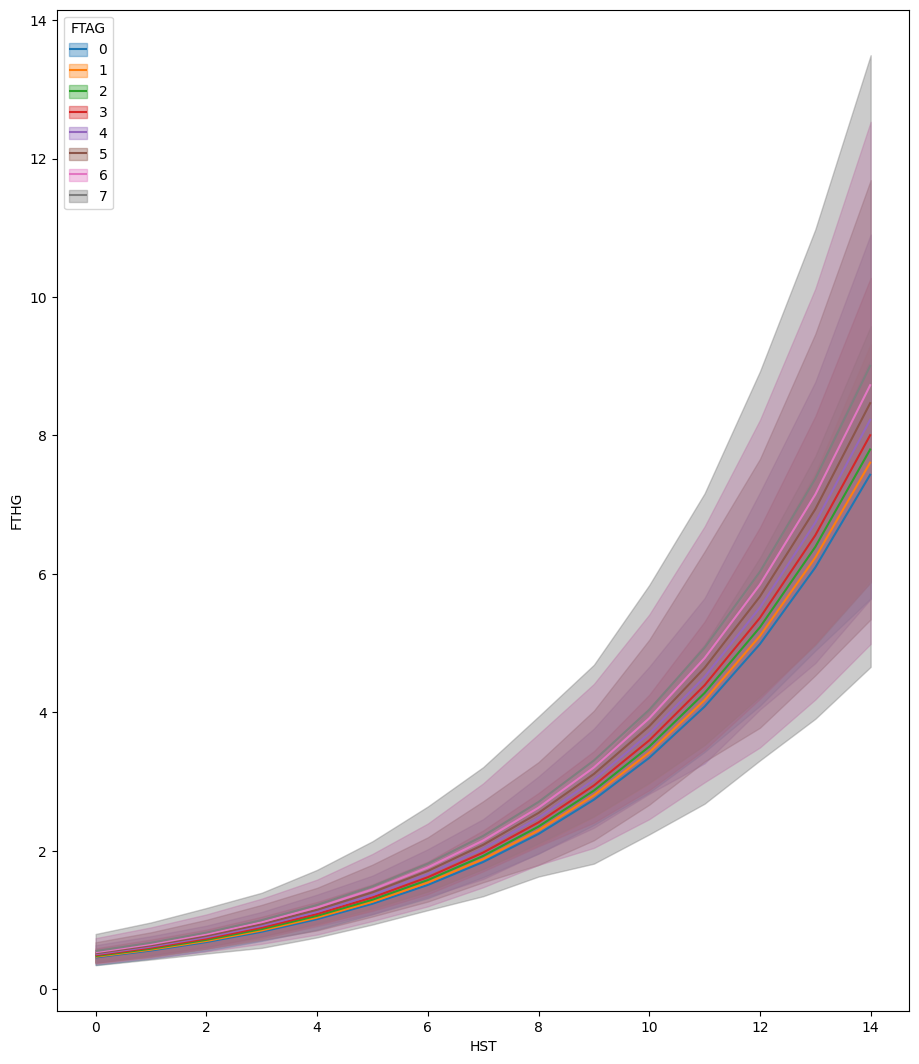

In [28]:
bmb.interpret.plot_predictions(model_shotaway,
                               idata_shotaway,
                               ["HST","FTAG"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

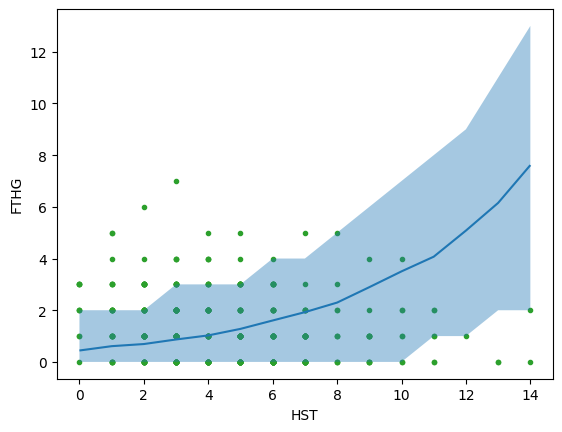

In [29]:
bmb.interpret.plot_predictions(model_shotaway, idata_shotaway, "HST", pps = True)
plt.plot(soccer.HST, soccer.FTAG, "C2.", zorder=-3)

This one capture a decent amount of points, but the line doesn't really follow a correaltion at all. Slope should be a lot flatter for the plot.

In [30]:
#cmp_df stands for compare dataframe
cmp_df = az.compare( {"All":idata_every,"Shots + Target":idata_shotgoal,"Target + Corner":idata_shotcorner,"Target + AyGoals":idata_shotaway} )

#0 is the best rank; we want a lower elpd_loo
cmp_df

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Shots + Target,0,-500.558731,2.342988,0.000000,0.481768,11.984051,0.000000,False,log
Target + Corner,1,-500.662837,2.338720,0.104105,0.518232,11.957162,3.262478,False,log
All,2,-500.903323,5.388989,0.344592,0.000000,12.064282,2.294331,False,log
Target + AyGoals,3,-506.304394,2.253502,5.745663,0.000000,11.824237,2.919896,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

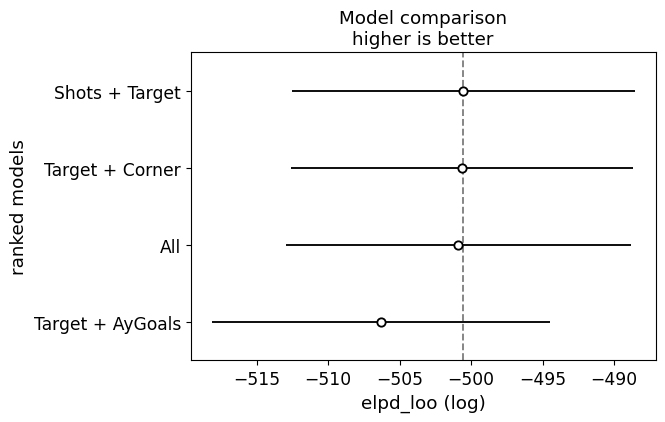

In [31]:
az.plot_compare(cmp_df)

This comparison tells me that most of these are the same, but that shots + Target was the best model. Of the stats I chose to display, I think that HST (Home Shots on Target) was by far the stat that correlated the strongest with goals, and since all of these models contained that stat, they were all roughly the same. I think there was also a misunderstanding with how some of the stats are collected, as I thought HS(Shots) would be a different stat for how many shots were missed, but it is actually the total number of shots with HST being a subset of HS.